<a href="https://colab.research.google.com/github/HafizAQ/ML_Practices/blob/main/DL_ML_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Courtesy: https://www.datacamp.com/blog/introduction-to-unsupervised-learning
#Unsupervised Learning
- No label data is availble, focusses input data without corresponding its target values
- Learning the underline structure of the un-lable data

####Tasks of Un-supervised Learning ALgorithm
- Clustering (e.g. Kmeans, Kmod): Exclusive Clustering, Overlapping Clustering, Hierarchical Clustering, Probabilistic Clustering
- Association Rules Mining (e.g maket-baskit analysis)
- Dimensionality Reduction

####Un-supervised Learning Applications
- Natural Language Processing (NLP)
- Image and Video Analysis (object recognition)
- Anomaly Detection (identify data points, events, observations that deviate from a dataset's normal behavior)
- Customer Segmentation
- Recommendation Engines

#Principal Coponent Analysis (PCA)

- PCA examine the interrelations among a set of variables.
- It reduces the dimensionality of the dataset and preserves the most important patterns or relationships between the variables
- Uses an orthogonal transformation that converts a set of correlated variables to a set of unrrelated variables
- The variance of the data in low-dimension space should be maximum

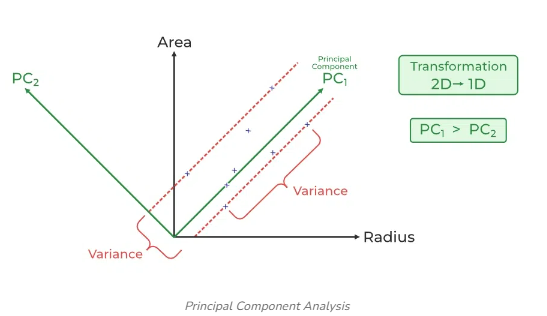

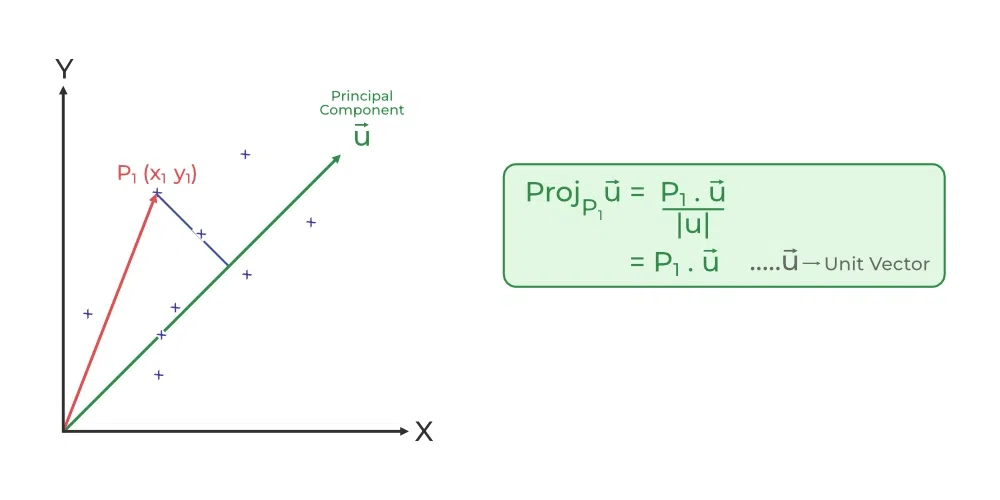


####Advantages of PCA
- Dimensionality Reduction
- Feature Selection
- Data Visualization
- Mulil-collinearity
- Noise Reduction
- Data Compression
- Outlier Dectection

####Disadvantages of PCA
- Interpretation of Principal Components (in terms of original variables)
- Sensitive to data scaling
- Information Loss
- Non-linear Relationship, PCA may not work well if the relationship between variables is non-linear
- Computational Complexity, if the no. of variables in the dataset is large
- Overfitting: perform poorly on new data

Original Dataframe shape : (569, 31)
Inputs Dataframe shape   : (569, 30)


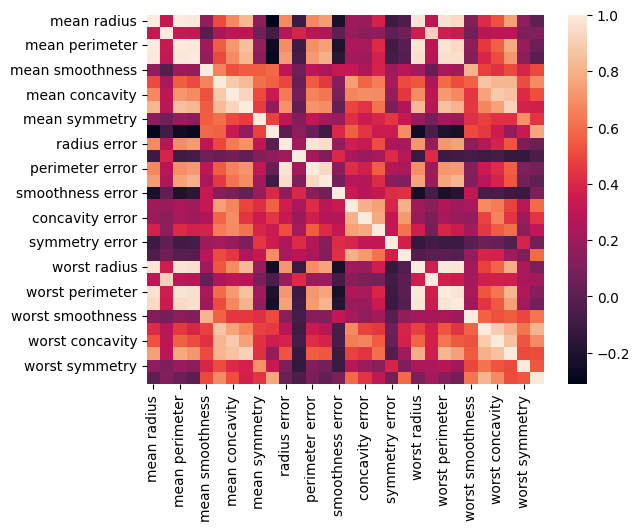

In [3]:
#PCA (Principal COmponent Analysis)
import pandas as pd
import numpy as np

# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer

# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame

# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)

#Pre-processing
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

#Plot Co-Variance Metrix: Visualize the strong dependency of two features with each other in the feature space
# covariance
c = Z.cov()

# Plot the covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(c)
plt.show()

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)
After Sorting
Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 3.11594025e-02
 2.99728939e-02 2.74394025e-02 2.43408378e-02 1.80550070e-02
 1.54812714e-02 8.17763986e-03 6.90046388e-03 1.58933787e-03
 7.48803097e-04

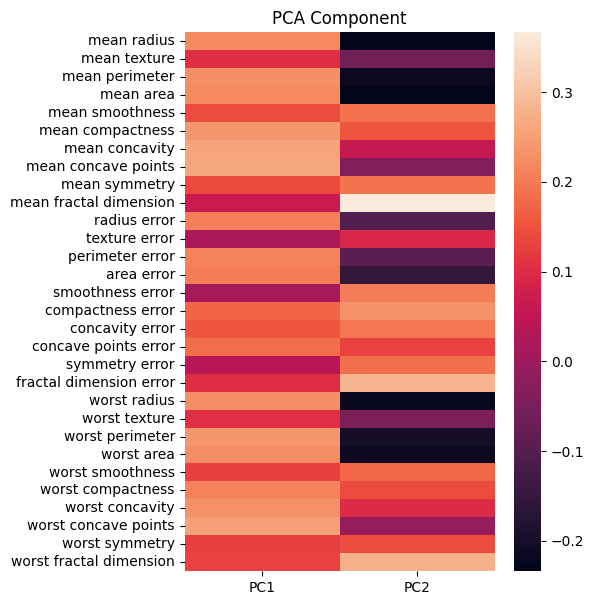

In [9]:
#Compute EigenVectors and Eigenvalues for our feature space. These will help to identifying the principal components for our feature space.
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)


#Sorting the eigenvalues in descending order and sort corresponding eigenvectors accordingly
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

print('After Sorting\nEigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

#Explained variance: giving the idea of the amount of total variance which as retained by selecting the principal components instead of the original feature space
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

#Determined the Principal Components
n_components = np.argmax(explained_var >= 0.50) + 1 #explained variance equal to or greater than 50%
n_components

#Project the Data onto the Selected Principal Components  (Projection Matrix)-> It projects the high-dimentional dataset onto a lower-dimensional subspace.
#The eigenvectors of the covariance matrix of the data are the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components.

# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = cancer['feature_names'],
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()


In [10]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)


          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


#####PCA implementation using Sklearn


In [12]:
# Importing PCA
from sklearn.decomposition import PCA

# Let's say, components = 2
pcaModel = PCA(n_components=2)
pcaModel.fit(Z)
x_pca = pcaModel.transform(Z)

# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(n_components)])
print(df_pca1)


           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


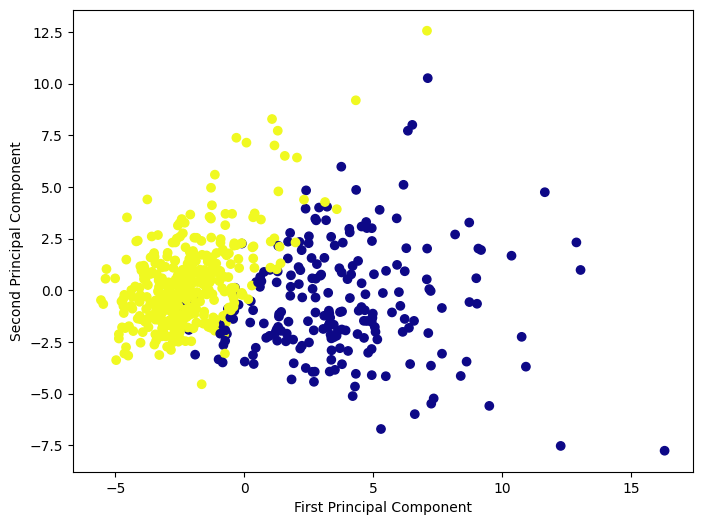

In [13]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=cancer['target'],
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

####Another Example



In [14]:
from sklearn.datasets import load_iris # Dataset
from sklearn.decomposition import PCA # Algorithm
import matplotlib.pyplot as plt # Visualization

# Load the data
iris_data = load_iris(as_frame=True)

# Preview
iris_data.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


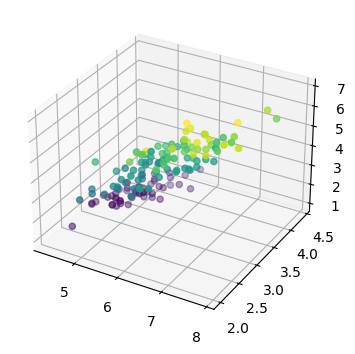

In [15]:
"""
Credit Link: https://www.tutorialspoint.com/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data
"""
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sepal_length = iris_data.data["sepal length (cm)"]
sepal_width = iris_data.data["sepal width (cm)"]
petal_length = iris_data.data["petal length (cm)"]
petal_width = iris_data.data["petal width (cm)"]

ax.scatter(sepal_length, sepal_width, petal_length, c=petal_width)
plt.show()

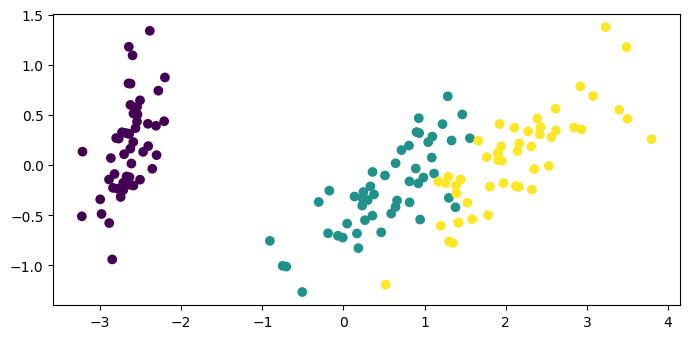

In [16]:
# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Train the model
pca.fit(iris_data.data)
iris_data_reduced = pca.fit_transform(iris_data.data)

# Plot data
plt.scatter(
    iris_data_reduced[:,0],
    iris_data_reduced[:,1],
    c=iris_data.target
)
plt.show()

Courtesy: https://github.com/AmirAli5/Deep-Learning/blob/main/Unsupervised%20Deep%20Learning/4.%20Self%20Organizing%20Map/Self%20Organization%20Map.ipynb

#Self-Organizing Maps (SOMs)

- The Self Organizing Map (SOM) is a competitive learning neural model based on unsupervised learning
- SOM clusters input data without human intervention and detects features within the data
- It helps visualize high-dimensional data by reducing its dimension and grouping similar data
- Developed by Professor Kohonen, SOM is widely used for data visualization and clustering tasks
- The network consists of a 2D grid of nodes, each fully connected to the input layer

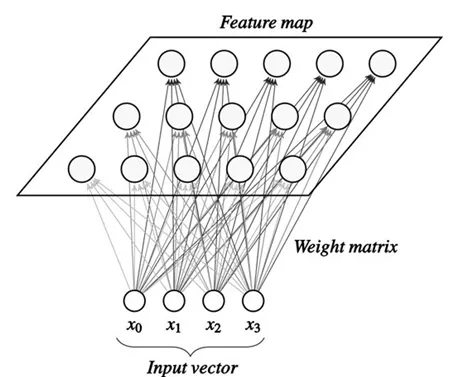

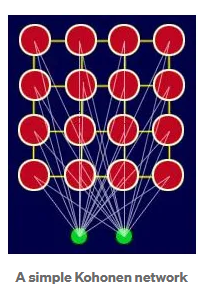


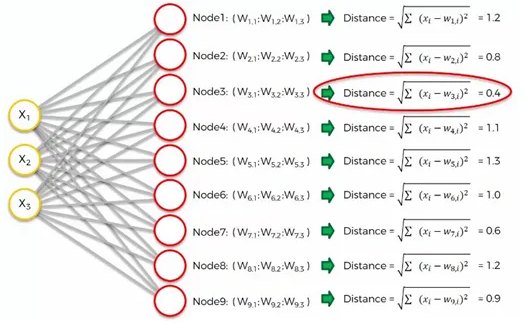

####**SOM Learning Algorithm**

- 1. Initialize each node's weights

- 2. Select a random vector from the training data and present it to the lattice (2x2)

- 3. Identify the node with weights most similar to the input vector, called the Best Matching Unit (BMU). The Euclidean distance

- 4. Calculate the BMU's neighborhood radius, starting large and decreasing over time. Nodes within this radius are considered part of the BMU's neighborhood.

- 5. Adjust the weights of neighboring nodes to resemble the input vector, with closer nodes getting more adjustments.

- 6. Repeat steps 2-5 for N iterations.

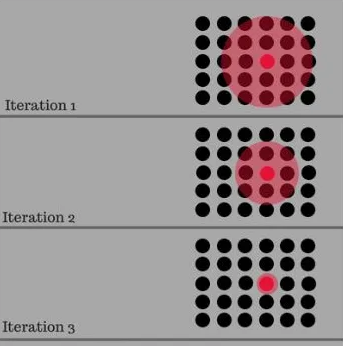


In [19]:
#i) Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Import the dataset
dataset=pd.read_csv('Credit_Card_Applications.csv')
X=dataset.iloc[:,:-1].values  # Predictor attributes
Y=dataset.iloc[:,-1].values   # Target attribute

dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [27]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)
print('X after scaling: ', X)

X after scaling:  [[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


In [30]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=da8184e1c0ea29eb8d889dde4fa815aa4307a6e3b6ae41dea9acf29f13362b9d
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [31]:
#ii) Building the SOM (Self-Organizing Maps)

# Import the SOM Model
from minisom import MiniSom

# Init the Model
som =MiniSom(x=10 ,y=10 ,input_len=15, sigma=1.0 , learning_rate=0.5)

# Randomly Initialize the Weight of Visible Nodes
som.random_weights_init(X)

# Train the Model on Predictor Attributes
som.train_random(data=X, num_iteration=100)

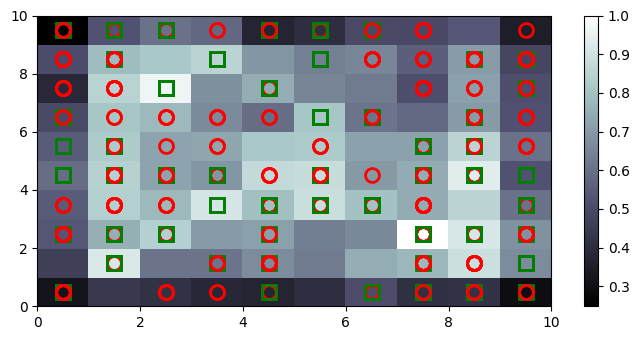

In [32]:
#iii) Visualize the SOM and Find the Cheat Customers

# Visualizing the results
from pylab import bone,pcolor, colorbar ,plot , show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors=['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[Y[i]],
        markeredgecolor = colors[Y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

In [40]:
# Find the Cheat Customers
mappings = som.win_map(X)
# print(mappings)

# Check if the keys exist in mappings before concatenating
if (5,1) in mappings and (6,2) in mappings:
  frauds=np.concatenate((mappings[(5,1)],mappings[(6,2)]), axis=0)
  # Check if frauds is empty before reshaping and applying inverse_transform
  if frauds.size != 0:
    # Reshape frauds to a 2D array if it's not empty
    frauds = frauds.reshape(-1, 1) if frauds.ndim == 1 else frauds
    frauds = sc.inverse_transform(frauds)
else:
  print("Warning: Keys (5,1) or (6,2) not found in mappings. 'frauds' will be empty.")
  frauds = np.array([])  # or keep frauds as an empty array

frauds

array([], dtype=float64)

Courtesy: https://www.geeksforgeeks.org/restricted-boltzmann-machine-features-for-digit-classification-in-scikit-learn/

#Restricted Boltzman Machine (RBM)
- Features for Digit Classification in Scikit Learn
- **Restricted Boltzmann Machines (RBMs)** are neural networks used for unsupervised learning and generative modeling.
- They **minimize energy like probabilistic graphical models**. Initially based on Hopfield networks, RBMs introduced hidden layers for generative tasks.
- RBMs are commonly used for **dimensionality reduction** and often undergo unsupervised pretraining, benefiting future supervised learning.
- They cannot be trained using **backpropagation** and rely on **Monte Carlo sampling** methods.
- The most common training algorithm for **RBMs** is **contrastive divergence**, which **approximates gradients** through **sampling**.


#### Restricted Boltzmann Machine Model Architecture
- Visible Layer
- Hidden Layer
- Connections
- Biases

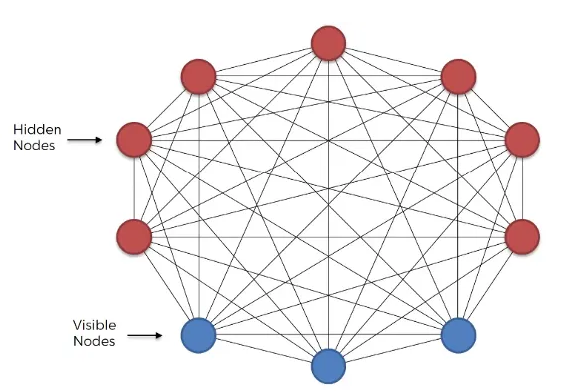

- Neuron connection is not limited to neurons of other layers; it is also connected to neurons of the same layer.

- Boltzmann Machine is a generative unsupervised model, which involves learning a probability distribution from an original dataset and using it to make inferences about never before seen data.
- The original Boltzmann machine had connections between all the nodes. Since RBM restricts the intralayer connection, it is called a Restricted Boltzmann Machine. Asymmetric bipartite graph


In [1]:
#i) Import necessary libraries
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ii) Load the MNIST dataset
digits = load_digits()

# iii) Digits image (feature metrix & target vector)
X = digits.data
Y = digits.target

print(X.shape)
print(Y.shape)

#iv) Min-max scaling
X_scaled = minmax_scale(X, feature_range=(0, 1))
print(X_scaled.shape)

(1797, 64)
(1797,)
(1797, 64)


In [2]:
#v) Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y,
													test_size=0.2, random_state=42)

Epoch = 15
#vi) Create an RBM model
rbm = BernoulliRBM(n_components=100, learning_rate=0.02, n_iter=Epoch,
				random_state=42, verbose=True)

#v) Create a classifier
classifier = LogisticRegression(max_iter=500)

#vi) Create a pipeline combining RBM and classifier
pipeline = Pipeline(steps=[('rbm', rbm), ('classifier', classifier)])

#vii) Train the model
pipeline.fit(X_train, y_train)

#viii) Make predictions on the test set
y_pred = pipeline.predict(X_test)

#ix) Evaluate the model
print('\nClassification Report :\n',classification_report(y_test, y_pred))


[BernoulliRBM] Iteration 1, pseudo-likelihood = -26.07, time = 0.28s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -25.78, time = 0.25s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -25.69, time = 0.20s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -25.56, time = 0.21s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -25.77, time = 0.24s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -25.55, time = 0.10s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -25.62, time = 0.17s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -25.38, time = 0.18s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -24.95, time = 0.20s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -24.67, time = 0.23s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -23.88, time = 0.35s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -23.51, time = 0.29s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -22.78, time = 0.19s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -22.45, time = 0.21s
[BernoulliRBM] Iteration 15, 

Courtesy: https://medium.com/analytics-vidhya/autoencoders-with-tensorflow-2f0a7315d161

#AutoEncoder

- Autoencoders are unsupervised neural networks designed to represent multi-dimensional data with fewer parameters.
- Introduced the ability to learn nonlinear mappings for reducing data dimensions (data compression), contributing significantly to the literature.
- The data is denoised using autoencoder







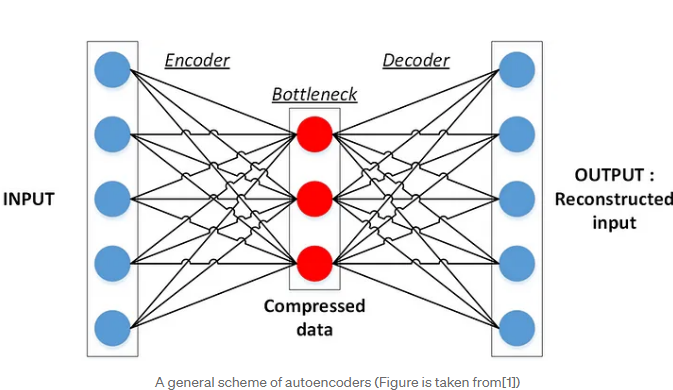

In [3]:
#i) Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint

In [4]:
#ii) The data
(x_train, _), (x_test, _)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
#iii) The Encoder
hidden_size = 100
latent_size = 20
input_layer = layers.Input(shape = x_train.shape[1:])
flattened = layers.Flatten()(input_layer)
hidden = layers.Dense(hidden_size, activation = 'relu')(flattened)
latent = layers.Dense(latent_size, activation = 'relu')(hidden)
encoder = Model(inputs = input_layer, outputs = latent, name = 'encoder')
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           2,020 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,520 (314.53 KB)

 Trainable params: 80,520 (314.53 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#iv The Decoder
input_layer_decoder = layers.Input(shape = encoder.output.shape[1:]) # Change here: Use shape[1:]
upsampled = layers.Dense(hidden_size, activation = 'relu')(input_layer_decoder)
# Change here:  Adjust the output dimension to match the flattened input size
upsampled = layers.Dense(np.prod(x_train.shape[1:]), activation = 'relu')(upsampled)
constructed = layers.Reshape(x_train.shape[1:])(upsampled)
decoder = Model(inputs = input_layer_decoder, outputs = constructed, name= 'decoder')
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │          79,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,284 (317.52 KB)

 Trainable params: 81,284 (317.52 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#The Autoencoder

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           2,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 28, 28)              │          81,284 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,804 (632.05 KB)

 Trainable params: 161,804 (632.05 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
autoencoder.compile(optimizer = 'adam', loss = losses.MeanSquaredError())

history = autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 64, validation_data = (x_test, x_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 2698.0129 - val_loss: 1567.9373
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 1534.2014 - val_loss: 1427.3962
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 1431.1044 - val_loss: 1375.9978
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1382.9712 - val_loss: 1344.4556
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 1348.6633 - val_loss: 1294.6063
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 1302.7615 - val_loss: 1254.5131
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1259.6743 - val_loss: 1234.4106
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1247.3220 - val_loss: 1230.2559
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1238.1869 - val_loss: 1213.2119
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 1219.9214 - val_loss: 1202.0929
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1214.3506 - v

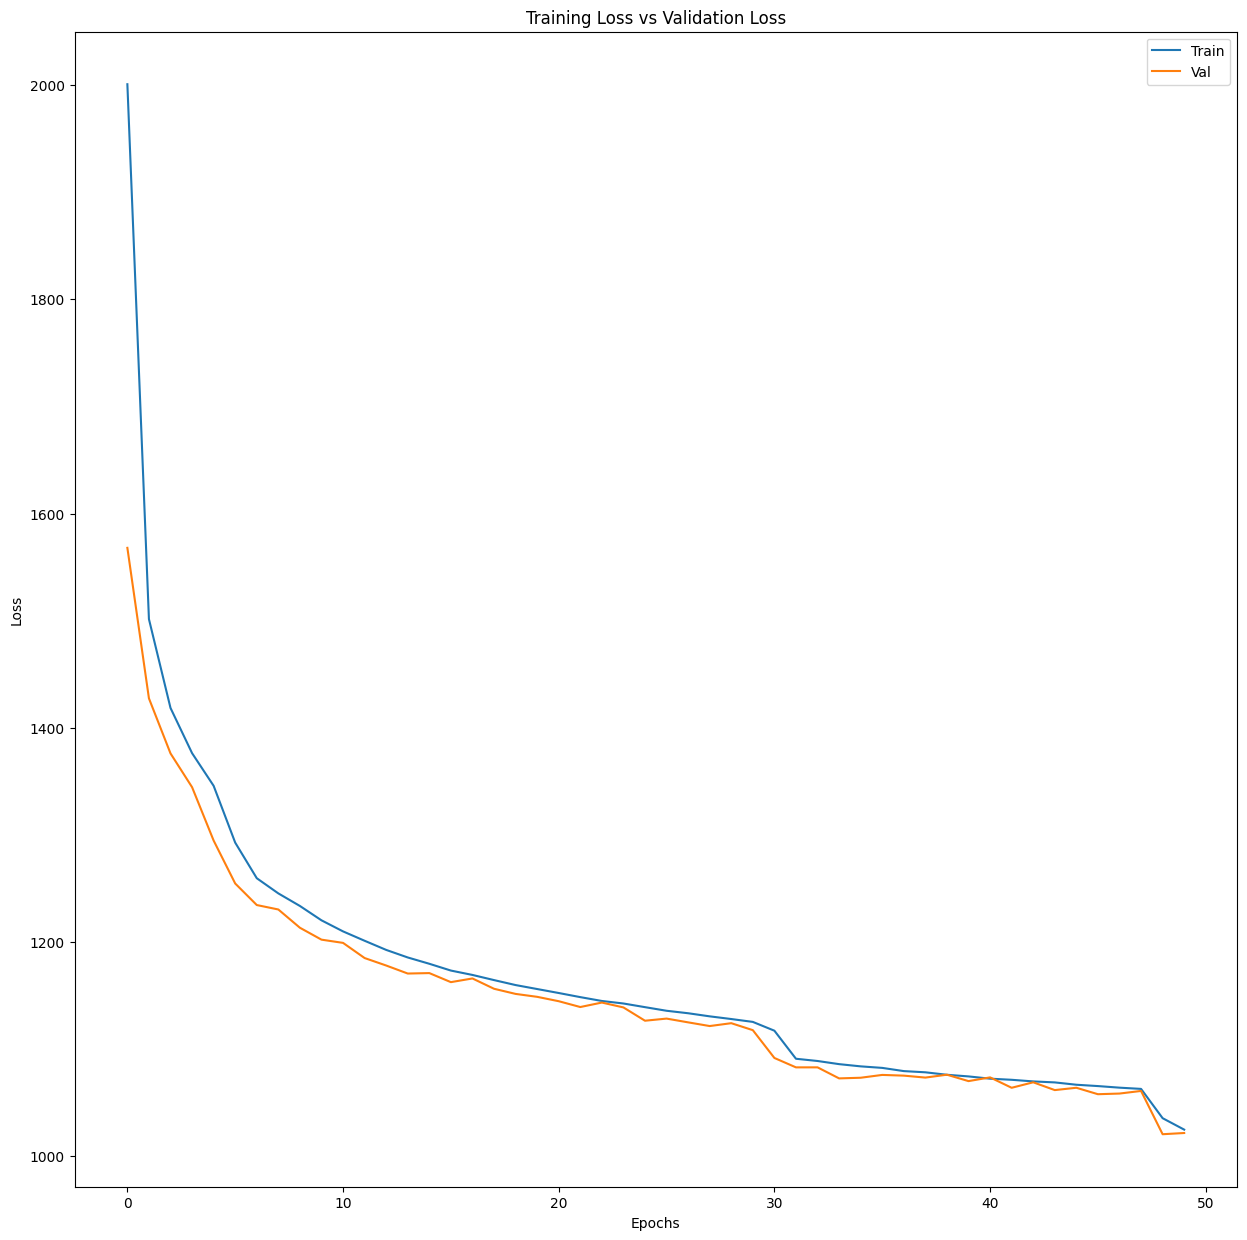

In [14]:
#Visualization

fig, axs = plt.subplots(figsize=(15,15))
axs.plot(history.history['loss'])
axs.plot(history.history['val_loss'])
axs.title.set_text('Training Loss vs Validation Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend(['Train','Val'])